In [27]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
from dfply import *
from plotnine import *
import seaborn as sns
import missingno
import random

# Stopwords from sklearn
# Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

#### Stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw

## Sentiemtn Analysis
import textblob
import vaderSentiment

# Count vectorizer for word frequencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Lemonizer
from nltk.stem.wordnet import WordNetLemmatizer
# Stemer
from nltk.stem import SnowballStemmer

# Topic modeling
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora
import pickle # saves the object into a file
# But don't worry Python can understand it
# import spacy
# spacy.load('en_core_web_sm')
# from spacy.lang.en import English
# parser = English()
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
from transformers import pipeline

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [28]:
import sys
# !{sys.executable}-m pip install --upgrade ipykernel

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [29]:
# Stopword calculations
en_stop = set(nltk.corpus.stopwords.words('english'))
specialChars = "!@#$%^&*()\'\"?.,~<>_-+{}[]|;"
myPunc = set(specialChars)
en_stop.update(myPunc)
en_stop.add('n\'t')

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [30]:
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(speeches.shape)
print(speeches.columns)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(7507, 7)
Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')


7507 rows, 7 different columns.

In [31]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

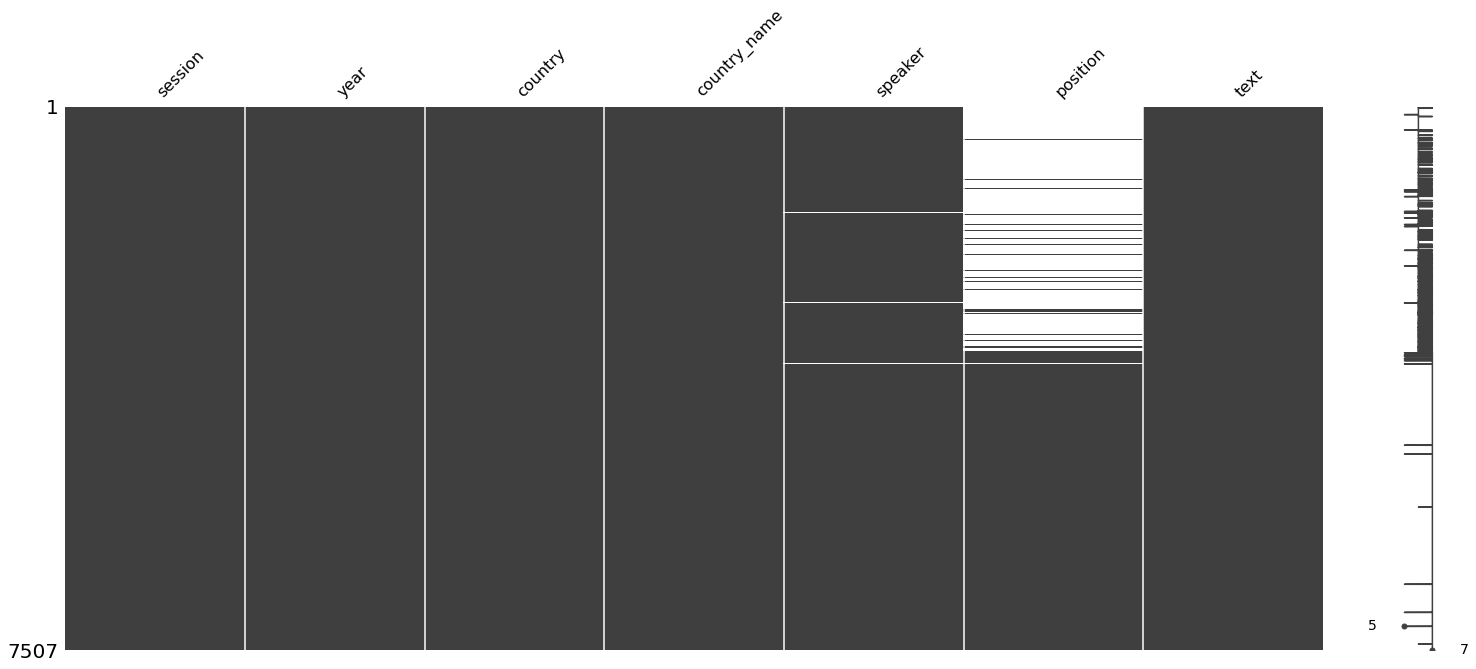

In [32]:
missingno.matrix(speeches)

Position appears to be the column with the biggest amount of missingness.

In [33]:
speeches.isna().sum()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

Wow. There are quite a bit of NAs in the `position` column. I wonder why. 

And a little bit in the `speaker` column.

My God these humans talked a FREAKTON! 

I'd rather eat horse scat off a rotting cow than read this mess.

In [35]:
# Creating an nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(speeches.text[0])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Printing text, lemma, parts of speech...

In [ ]:
# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)

In [ ]:
textblob.TextBlob(doc.text).sentiment.polarity

As a whole, the first speech is filled with 0.12 sentiment. Barely positive feelings.

In [ ]:
print(f"Number of stop words in nltk list: {len(nltk_sw)}")
print(f"Number of stop words in list: {len(spacy_sw)}")
#### Comparing stopword lists
print(f"Words in spacy but not in nltk: {spacy_sw.difference(set(nltk_sw))}")

In [ ]:
#### Comparing stopword lists
print(f"Words in spacy but not in sklearn: {spacy_sw.difference(esw)}")

In [ ]:
#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(en_stop, spacy_sw)
# both_sw = en_stop.update(spacy_sw)
print(f"Length of both nltk and spacy stopwords: {len(both_sw)}")



We have successfully combined nltk, spacy, and Daniel's stop words!

In [ ]:
### Vectorize training text, set min_df to 5
speeches_text = CountVectorizer(min_df=5).fit_transform(speeches["text"])
# We want words who appear in at least 5 docs

In [ ]:
print(f"Number Of Features, taking words that occur in at least 5 dfs: {speeches_text.shape[1]}")

In [ ]:
speeches.head()

## Vectorization

- Lowercase
- Tokenize
- Build vocab: collect all vocab
- Lemmatize
- Remove stopwords? and punctuation
- Encode: count frequency of each word in each speech

Daniels crazy idea

- Grab multiple SA packages

- SA of each speech

- Graph the mean of each SA package or whatever and compare them?

In [76]:
def get_lemma(word, myLemonizer = WordNetLemmatizer()):
    '''
    Lemmatizes the word
    
    @param String word the given word to lemmatize
    @param myLemonizer the given lemmatizer; optional
    @return the newly lemmatized core word
    '''
    
#     print("word lemonizer", WordNetLemmatizer().lemmatize(word))
    # Should I do stemming too? Hmmmm
    return myLemonizer.lemmatize(word)

def get_stemmer(word, myStemmer = SnowballStemmer(language = "english")):
    '''
    Stems the word
    
    @param String word the given word to stem
    @param myStemmer the given stemmer; optional
    @return the newly stemmed core word
    '''
    return myStemmer.stem(word)
    

def removePunctuation(word):
    '''
    Removes punctuation from a given word
    
    @param String word the given word
    @return the word, without punctuation
    '''
    
    lastIndex = len(word) - 1
    if word[lastIndex] in myPunc:
        # eradicate the last index value
        return word[:-1]

    return word
    

def prepare_text_for_lda(text, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Tokenizes, splits, removes stopwords from the text.
    Basically, preparing text for LDA (one type of topic model)
    
    @param String text the given text
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the tokens
    '''
    text = text.lower()
    
    # Split by spaces
    tokens = text.split(" ")
    
    # Stripping away newline characters and tabs
    tokens = [word.strip("\n") for word in tokens]
    tokens = [word.strip("\t") for word in tokens]
#     tokens = [word.strip("\d") for word in tokens]
    # Strip damn numbers
    
    tokens = [token for token in tokens if len(token) > 1]
    # a
    
    tokens = [token for token in tokens if token not in both_sw]
#     if "the" or "an" or "and" in tokens:
# #         print(f"found the/an/and in: {tokens}")
#         print("found the/an/and")
    tokens = [get_lemma(token, myLemonizer) for token in tokens]
    tokens = [get_stemmer(token, myStemmer) for token in tokens]
    tokens = [removePunctuation(token) for token in tokens]
    return tokens

def getCleanedTokensList(data, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Gets cleaned tokens. 
    Processes include: lowercasing, splitting by spaces, strips spaces/tabs/newlines,
    punctuation, lemmatizing, stems
    
    @param DataFrame data the given data frame
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @param SnowballStemmer myStemmer the given stemmer
    @return the list of tokens for each speech
    '''
    text_data = []

    for line in data:
        tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
        text_data.append(tokens)
    return text_data


def generate_viz(data, NUM_TOPICS=5, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Graphs the data by topic.
    Also saves the files and model into other files
    
    @param list data the given list of Strings
    @param int NUM_TOPICS number of topics to graph; default set to 5
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the graph, dictionary, and corpus
    '''
#     text_data = []

#     for line in data:
#         tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
#         text_data.append(tokens)
    text_data = getCleanedTokensList(data, myLemonizer, myStemmer)

    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state = 420)
    ldamodel.save('model5.gensim')

    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(f"topic: {topic}")

    dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
    corpus = pickle.load(open('corpus.pkl', 'rb'))
    lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

    lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
    return lda_display, dictionary, corpus


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
("the" and "an" and "and") in both_sw

In [ ]:
print(len(en_stop))
print(f"Both stop length: {len(both_sw)}")
print("one" in en_stop)
# print(both_sw)

In [ ]:
# Updating Both_Sw
both_sw.update(["\n", "\t", "'s"])

# I also wanna eradicate words that appear in many documents, too
both_sw.update(["united", "states", "nation", "international"])

In [ ]:
# myLemonizer = WordNetLemmatizer()
# list_of_strings = speeches["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings[0:5], 3)
# pyLDAvis.display(viz)

In [ ]:
# myLemonizer = WordNetLemmatizer()
# # list_of_strings = speeches["text"].tolist()
# list_of_strings = (
#     speeches >>
#     mask((X.country_name == "China") | (X.country_name == "Canada"))
# )["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 2)
# pyLDAvis.display(viz)

## Topic Modelling For Each Country

In [ ]:
'''
for every country:
    list of strings
    spawn a viz, dictionary, corpus
    display
'''

countriesList = speeches["country_name"].unique()

numTopics = 3
for country in countriesList:
    
    # Grab the speeches from each country
    list_of_strings = (
        speeches >>
        mask(X.country_name == country)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Country/{country}.html")

In [ ]:
yearsList = [1980, 1990, 2000, 2010, 2015]
numTopics = 3
for myYear in yearsList:
    
    # Grab the speeches from each year-group
    list_of_strings = (
        speeches >>
        mask(X.year == myYear)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Year/{myYear}.html")

In [75]:
# Scratch
d.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


"The whole dam world is 3just as obsessed with \nwho's \tbetter dressed"

In [73]:
myLemonizer = WordNetLemmatizer()
a = "The sun is shining beautifully."
b = "The world has curiosity"
c = "Daniel is a dumb idiot"
d = "The whole dam world is 3just as obsessed with \nwho's \tbetter dressed"


text = [a, b, c, d]
# spareList = ["hello"]
# tokens = prepare_text_for_lda(text, myLemonizer)
# print(tokens)
# spareList.append(tokens)
# print(spareList)

viz, dictionary, corpus = generate_viz(text, 3, myLemonizer)
pyLDAvis.display(viz)

topic: (0, '0.211*"worl" + 0.210*"curios" + 0.053*"aniel" + 0.053*"umb"')
topic: (1, '0.100*"ress" + 0.100*"better" + 0.100*"who" + 0.100*"obsess"')
topic: (2, '0.181*"shine" + 0.181*"beautifully" + 0.181*"sun" + 0.046*"worl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
list_of_strings = speeches["text"].tolist()
myLemonizer = WordNetLemmatizer()
viz, dictionary, corpus = generate_viz(list_of_strings, 4, myLemonizer)
pyLDAvis.display(viz)

In [ ]:
# Can we save the viz?
print(type(viz))

In [ ]:
# list_of_strings = speeches["text"].tolist()
viz, dictionary, corpus = generate_viz(list_of_strings, 3)
pyLDAvis.display(viz)

In [ ]:
viz, dictionary, corpus = generate_viz(list_of_strings, 4)
pyLDAvis.display(viz)

In [66]:
myText = "34 more \n44moves"
myText.strip("\d+")
myText.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-66-4587ec8c108d>:2: DeprecationWarning: invalid escape sequence \d


'34 more \n44moves'

## Attempting More Topic Modeling

Using Prof Gregory Lyon's code

In [ ]:
def top_words_f(n_words):
    '''
    Extract the top words from each topic
    
    @param int n_words the number of top words to grab from each topic
    @return the resulting dataframe
    '''
    n_words=n_words
    imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]
    words_in_topic = ([imp_words(x) for x in lda.components_])
    main_topics = [' '.join(x) for x in words_in_topic]
#     df = pd.DataFrame(main_topics).T
#     df.columns = columns=["Topic_" + str(each) for each in range(lda.n_components)]
    df = pd.DataFrame({"top_words": main_topics},
                             index=["Topic_" + str(each) for each in range(lda.n_components)])
    return df

#### Steps:

    1: Instantiate vectorizer with parameters: vec
    2: Vectorize column of text with fit_transform: X
    3: Instantiate LDA model with parameters: lda
    4: Fit LDA model to vectorized text: doc_topics

In [36]:
# 1: create vectorizer
# countervectorizer transforms words into vectors!
vec = CountVectorizer(stop_words= both_sw)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [37]:
# get_stemmer()
# speeches["text"]
# text_data[0]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [38]:
myLemonizer = WordNetLemmatizer()
myStemmer = SnowballStemmer(language = "english")

# for mySpeech in speeches["text"]:
#     prepare_text_for_lda(mySpeech, myLemonizer, myStemmer)
text_data = getCleanedTokensList(speeches["text"], myLemonizer, myStemmer)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [64]:
# print(" ".join(text_data[0]))
print(text_data[0])

['33:', 'convey', 'presid', 'congratul', 'albanian', 'deleg', 'elect', 'presid', 'twenty-fifth', 'session', 'general', 'assembly?\n34.\tin', 'take', 'work', 'agenda', 'twenty', 'fifth', 'session', 'general', 'assembly', 'held', 'eve', 'twenty-fifth', 'anniversari', 'come', 'forc', 'charter', 'nations', 'peace-lov', 'member', 'wish', 'posit', 'present', 'occas', 'pictur', 'posit', 'satisfactori', 'activ', 'nations', 'albanian', 'delegation', 'part', 'taken', 'great', 'pleasur', 'draw', 'balanc', 'sheet', 'activ', 'cover', 'quarter', 'century', 'certain', 'short', 'period', 'life', 'organization', 'unfortunately', 'situation', 'creat', 'day', 'victori', 'achiev', 'power', 'rome', 'berlintokyo', 'axi', 'conceiv', 'spirit', 'principl', 'predomin', 'war', 'antifascist', 'coalition', 'organ', 'awaken', 'progress', 'human', 'hope', 'serv', 'import', 'factor', 'creat', 'better', 'condit', 'order', 'favor', 'caus', 'freedom', 'peac', 'world', 'security', 'activ', 'number', 'event', 'occur', 'wo

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [39]:
# print(text_data[0])
print(len(text_data))
speechesSeries = pd.Series()
for mySpeech in text_data:
#     textForm = " ".join(mySpeech)
    seriesForm = pd.Series(mySpeech)
    speechesSeries = speechesSeries.append(seriesForm, ignore_index=True)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-39-fd25541ce06f>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


7507


In [40]:
dictionary = gensim.corpora.Dictionary(text_data)

# For fun
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0 (1967)
1 (bissau)
2 ,bi
3 12
4 18
5 1938.
69.	the
6 1948
7 1967
8 21
9 22
10 2]


I want to extract words who appear in:

- fewer than 15 speeches
- more than 50% of speeches in total

and keep only the first 100000 most frequent words.

In [41]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Gensim doc2bow

In [42]:
bow_corpus = [dictionary.doc2bow(doc) for doc in text_data]
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Word 6 ("21") appears 1 time.
Word 12 ("acceler") appears 2 time.
Word 21 ("aegi") appears 1 time.
Word 23 ("affairs") appears 1 time.
Word 34 ("aid") appears 1 time.
Word 43 ("america") appears 1 time.
Word 48 ("angola") appears 2 time.
Word 56 ("appeal") appears 1 time.
Word 63 ("areas") appears 1 time.
Word 78 ("assum") appears 1 time.
Word 93 ("awar") appears 2 time.
Word 99 ("balanc") appears 1 time.
Word 104 ("basin") appears 1 time.
Word 106 ("battlefield") appears 1 time.
Word 107 ("behalf") appears 1 time.
Word 113 ("bloodi") appears 2 time.
Word 114 ("blow") appears 1 time.
Word 119 ("born") appears 1 time.
Word 128 ("brought") appears 1 time.
Word 134 ("came") appears 1 time.
Word 136 ("campaign") appears 2 time.
Word 143 ("carri") appears 2 time.
Word 150 ("century") appears 1 time.
Word 167 ("close") appears 2 time.
Word 176 ("combat") appears 1 time.
Word 182 ("conceiv") appears 1 time.
Word 183 ("concerned") appears 1 time.
Word 191 ("confirm") appears 1 time.
Word 197 (

In [43]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### LDA With Bag Of Words

In [44]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# oneList = " ".join(text_data)
# pd.Series(text_data)
# speeches["text"]

Topic: 0 
Words: 0.004*"arab" + 0.003*"palestinian" + 0.003*"israel" + 0.002*"co-oper" + 0.002*"regim" + 0.002*"struggl" + 0.002*"namibia" + 0.002*"union" + 0.002*"korea" + 0.002*"movement"
Topic: 1 
Words: 0.003*"iraq" + 0.002*"of
th" + 0.002*"palestinian" + 0.002*"convent" + 0.002*"rule" + 0.002*"israel" + 0.002*"union" + 0.002*"agenda" + 0.002*"collect" + 0.002*"sustain"
Topic: 2 
Words: 0.003*"struggl" + 0.003*"co-oper" + 0.003*"israel" + 0.003*"arab" + 0.003*"deleg" + 0.002*"soviet" + 0.002*"palestinian" + 0.002*"america" + 0.002*"union" + 0.002*"disarma"
Topic: 3 
Words: 0.003*"central" + 0.003*"sustain" + 0.002*"union" + 0.002*"israel" + 0.002*"palestinian" + 0.002*"deleg" + 0.002*"climat" + 0.002*"agenda" + 0.002*"summit" + 0.002*"european"
Topic: 4 
Words: 0.003*"climat" + 0.003*"japan" + 0.002*"deleg" + 0.002*"small" + 0.002*"sustain" + 0.002*"island" + 0.002*"union" + 0.002*"signific" + 0.002*"european" + 0.002*"comprehens"
Topic: 5 
Words: 0.002*"small" + 0.002*"sustain" + 

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


It appears that many of these words do not hold significant weight for each topic. Nevertheless, we can try to differentiate different topics. Topic 0 appears to be about co-operation between Palestine and Israel (two countries known to be at war with each other).

Topic 1 seems to be about delegation.

In [50]:
speechesSeries

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0                   33:
1                convey
2                presid
3             congratul
4              albanian
               ...     
10084225        develop
10084226    interaction
10084227         poster
10084228         expect
10084229             us
Length: 10084230, dtype: object

In [77]:
# 2: create dtm
# myX = vec.fit_transform(speeches["text"])
myX = vec.fit_transform(speeches["text"])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# 3 create lda
lda = LatentDirichletAllocation(n_components= 4, learning_method= "online")

In [ ]:
# 4 fit lda
doc_topics = lda.fit_transform(myX)

In [ ]:
# 5
print(f"There are {lda.components_.shape[0]} topics and {lda.components_.shape[1]} words")

### Extracting Top Words From Each Topic

In [ ]:
## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names())
voc

In [ ]:
"nations" in both_sw

In [ ]:
# Call function and specify number of top words
numTopWords = 10
main_topics_df = top_words_f(numTopWords)
main_topics_df

In [ ]:
for i, each in enumerate(main_topics_df["top_words"]):
    print(f"Top words in topic {i}: {each}\n")

In [ ]:
topicDict = {
    0: "national security",
    1: "people",
    2: "countries",
    3: "development"
}

In [ ]:
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(myX.shape[0])]

In [ ]:
# the fitted lda model
print(doc_topics.shape)
doc_topics

Honestly, doc_topics is simply a bumnch of weights

In [ ]:
df_topics_df = pd.DataFrame(np.round(doc_topics, 2),
                        columns=cols,
                        index=docs)
imp_topic = np.argmax(df_topics_df.values, axis=1)
df_topics_df["top_topic"] = imp_topic
df_topics_df

In [ ]:
# TODO: horizontally concat with speeches

In [ ]:
# pyLDAvis.save_html(viz, 'lda.html')
# pyLDAvis.save_html(viz, "lda_4_topics.html")

In [ ]:
summarize = pipeline("summarization")
summary = summarize(list_of_strings[0:1], max_length = 10, clean_up_tokenization_spaces=True)
summary

In [ ]:
'''
for every speech:
    spawn nlp()
    tokenize()
    remove stop words
    remove punctuation and special characters!
    
'''
def toTokenize(text):
    '''
    Tokenizes a text
    
    @param NLP text the given NLP figure
    @return a list of tokenized words
    '''
    text_tokenized = []

    for t in text:
        text_tokenized.append(t.text)
    return text_tokenized

def removeStopwords(text_tokenized, sw = both_sw):
    '''
    Removes stopwords from a given tokenized text list
    
    @param list text_tokenized the given list of tokenized words
    @param set sw default is the nltk-spaCy stopwords
    @return a filtered, tokenized list (without stopwords!)
    '''
    
    # Filter out stopwords (using list comprehension)
    text_filtered = [w for w in text_tokenized if w not in sw]
    return text_filtered

def toLemmatize():
    '''
    
    '''
    print("helo")

maxNumDoc = 3
# docIndex = 0
for docIndex in range(len(speeches.text[0:maxNumDoc])):

    speech = speeches["text"][docIndex].lower()
    
    # nlp object
    nlpSpeech = nlp(speech)
    
    # tokenize speech
    text_tokenized = toTokenize(nlpSpeech)
    
    # tokenized, no stopwords
    text_filtered = removeStopwords(text_tokenized)
    
    
    vec = CountVectorizer
#     sentiment_polarity = [textblob.TextBlob(speech.text).sentiment.polarity for speech in doc]
#     print(len(sentiment_polarity))

In [ ]:
# print("hello")
myLemonizer = WordNetLemmatizer()
myStemmer = SnowballStemmer(language = "english")
words = ["viet-nam", "Vietnam", "Viet", "depending", "depends", 
         "carries", "carry", "carri", "generosity", "generous", "better",
         "best", "in a meeting", "meeting", "am meeting you", "countries", "country"
        ]
for word in words:
    word = word.lower()
    print(f"Lemmatize: {myLemonizer.lemmatize(word)}, Stem: {myStemmer.stem(word)}")

In [ ]:
sentiment_polarity = [textblob.TextBlob(speech).sentiment.polarity for speech in speeches.text[0:5]]
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

In [ ]:
# sentiment_polarity

In [ ]:
predicted_sentiments

Spliting CSV files in Python

https://dzone.com/articles/splitting-csv-files-in-python